In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Marketing Analytics/E-Commerce Churn Data.csv')

In [32]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [33]:
df.shape

(5630, 20)

In [34]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [35]:
# To see the percentage of null

264/df.shape[0]

0.04689165186500888

In [36]:
# Looking at the values per column

for i in range(df.shape[1]):
  print(df.iloc[:,i].value_counts())

CustomerID
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: count, Length: 5630, dtype: int64
Churn
0    4682
1     948
Name: count, dtype: int64
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: count, dtype: int64
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
WarehouseToHome
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.

In [37]:
df_cleaned = df.copy()

In [38]:
#Take tenure 0 and Blanks and np.Nan

df_cleaned['Tenure'] = df_cleaned['Tenure'].replace([''], np.nan)

In [39]:
#Replacing the words CC with Credit card in the PreferredPaymentMode column
#Replacing the words COD with Cash on Delivery in the PreferredPaymentMode column
#Replacing the words E wallet with UPI in the PreferredPaymentMode column

df_cleaned['PreferredPaymentMode']=df_cleaned['PreferredPaymentMode'].replace('CC','Credit Card' )
df_cleaned['PreferredPaymentMode']=df_cleaned['PreferredPaymentMode'].replace('COD','Cash on Delivery' )


df_cleaned['PreferredLoginDevice']=df_cleaned['PreferredLoginDevice'].replace('Phone','Mobile Phone' )

In [40]:
df_cleaned.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

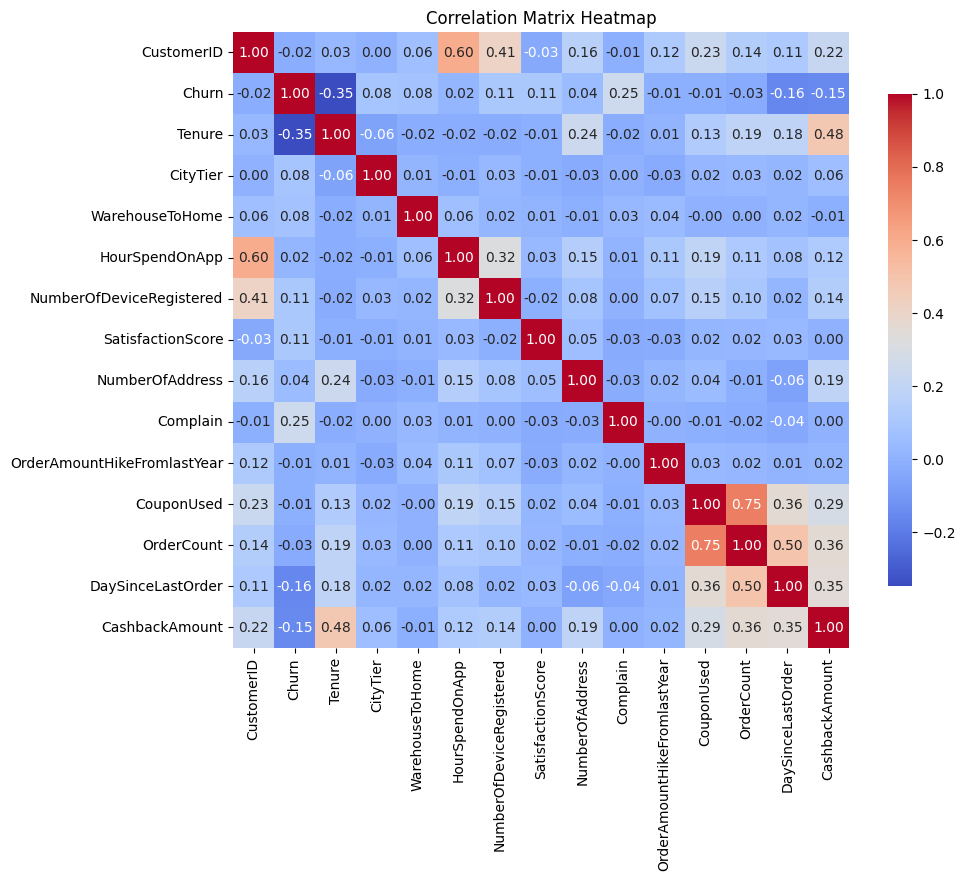

In [42]:
# Calculate the correlation matrix
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_columns].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

By checking the corelation, there is lower corelation between tenure and other columns

In [43]:
# 1. Median imputation for the 'Tenure' column
median_imputer = SimpleImputer(strategy='median')
df_cleaned['Tenure'] = median_imputer.fit_transform(df_cleaned[['Tenure']])
df_cleaned['WarehouseToHome'] = median_imputer.fit_transform(df_cleaned[['WarehouseToHome']])
df_cleaned['OrderAmountHikeFromlastYear'] = median_imputer.fit_transform(df_cleaned[['OrderAmountHikeFromlastYear']])
df_cleaned['DaySinceLastOrder'] = median_imputer.fit_transform(df_cleaned[['DaySinceLastOrder']])
df_cleaned['HourSpendOnApp'] = median_imputer.fit_transform(df_cleaned[['HourSpendOnApp']])

imputer = IterativeImputer(max_iter=10, random_state=0)
df_cleaned[['CouponUsed', 'OrderCount']] = imputer.fit_transform(df_cleaned[['CouponUsed', 'OrderCount']])

In [44]:
df_cleaned.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


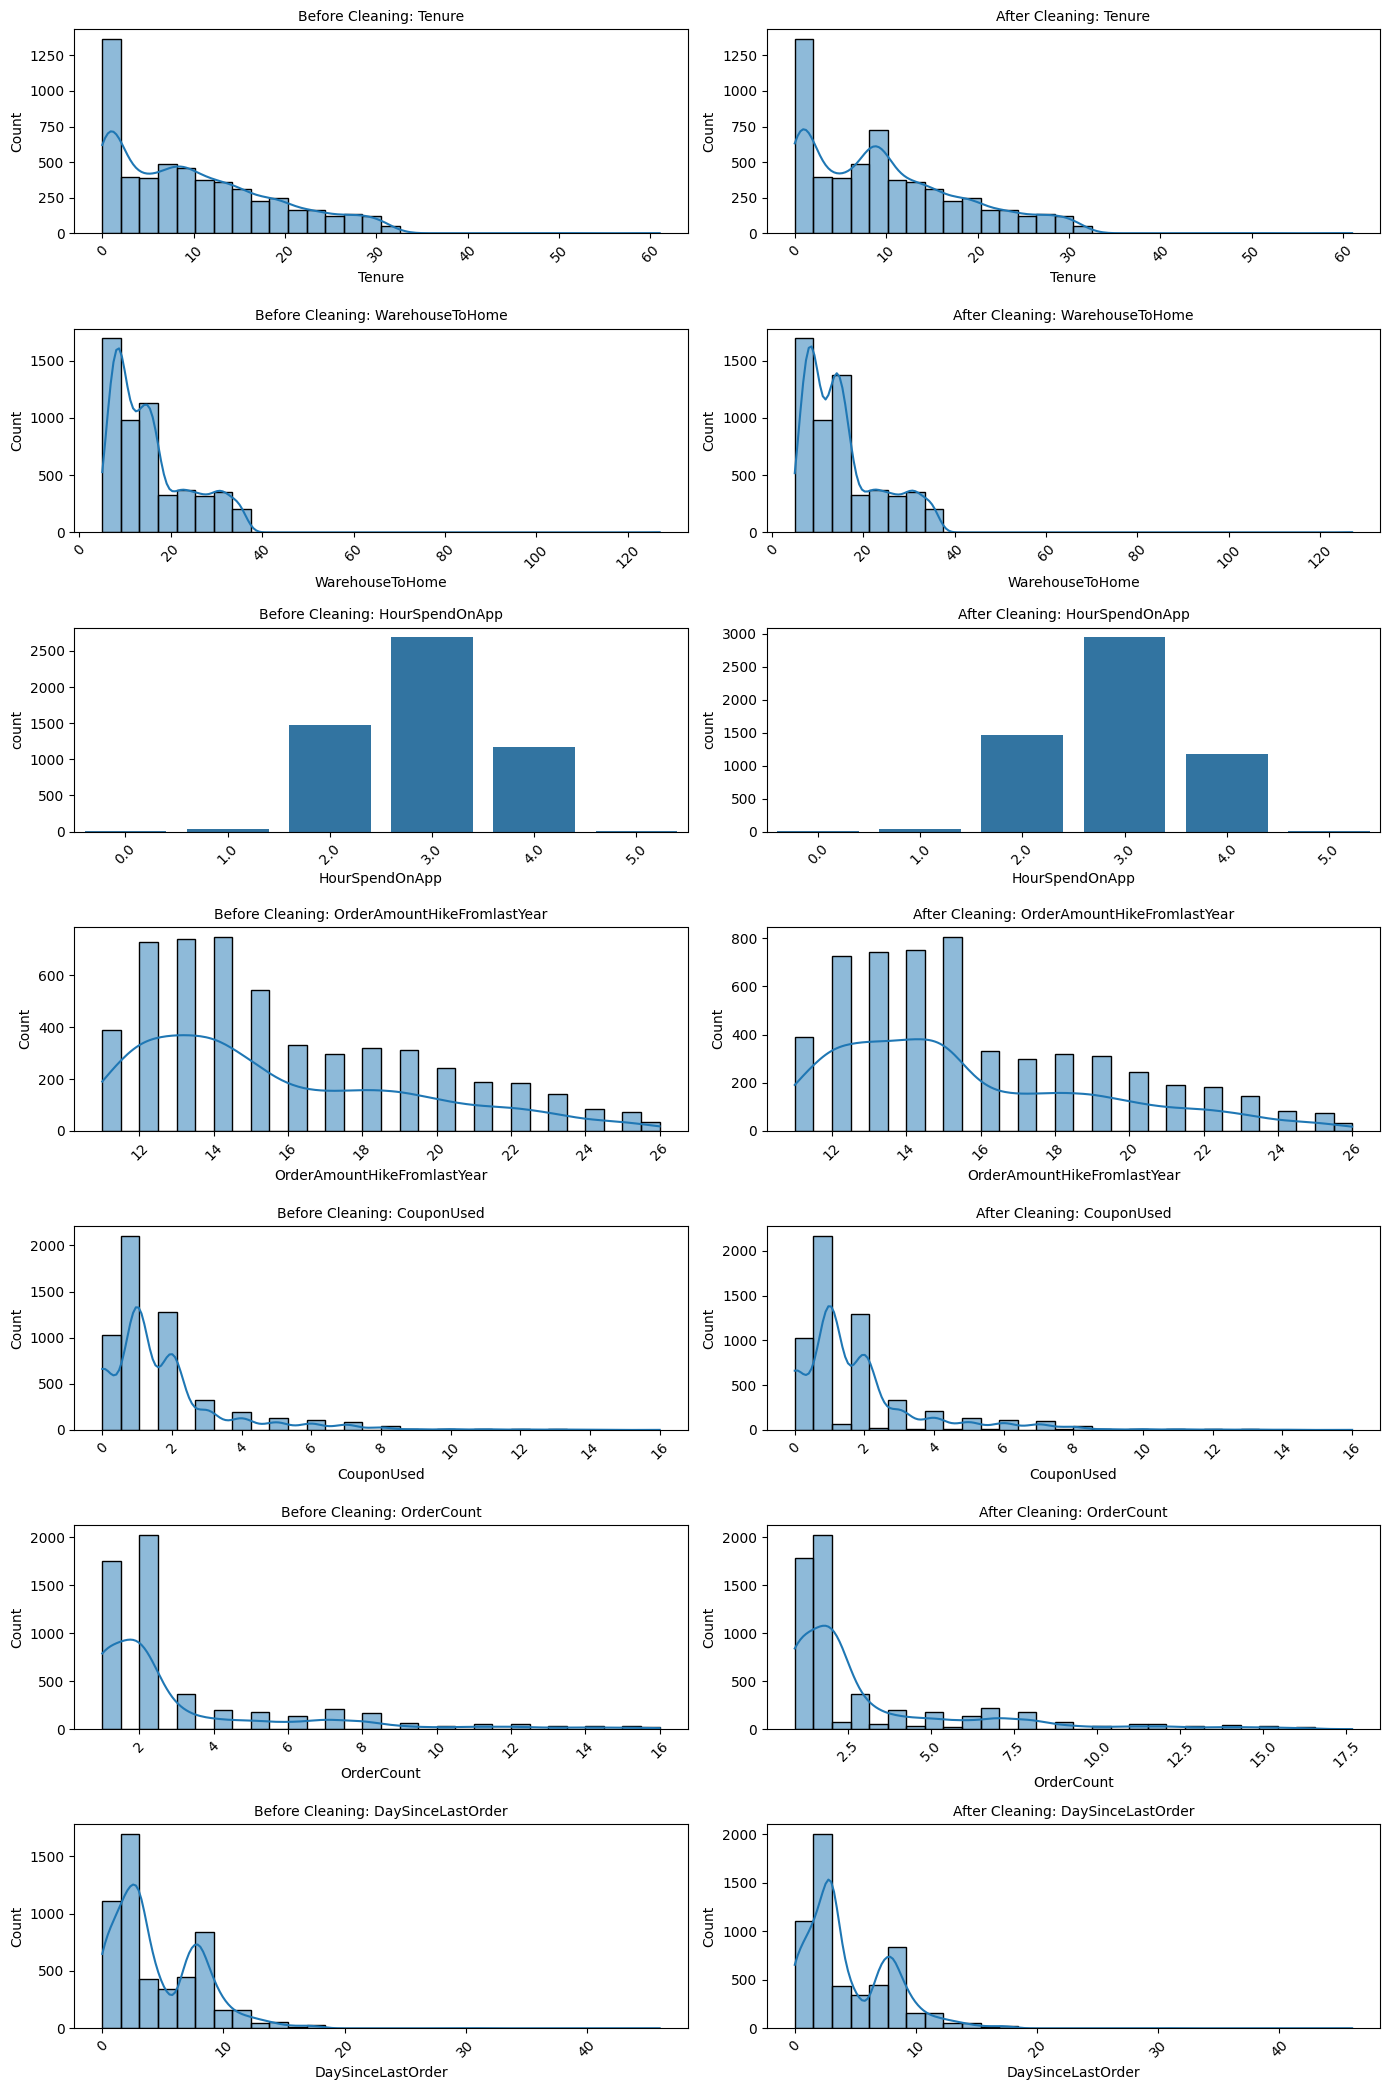

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns with null values
columns_with_null = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Function to plot distributions for both original and cleaned data side by side
def plot_distributions_comparison(df_before, df_after, columns, title_prefix_before, title_prefix_after):
    n_cols = 2  # Number of columns in the grid layout
    n_rows = len(columns)  # One row per column comparison (original vs cleaned)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))  # Adjust figure size for two columns
    axes = axes.flatten()

    # Loop through each column and plot both before and after distributions side by side
    for i, col in enumerate(columns):
        # Plot for original (before cleaning)
        if df_before[col].dtype == 'object' or len(df_before[col].unique()) <= 10:
            sns.countplot(x=col, data=df_before, ax=axes[2 * i])
        else:
            sns.histplot(df_before[col], bins=30, kde=True, ax=axes[2 * i])
        axes[2 * i].set_title(f'{title_prefix_before} {col}', fontsize=10)
        axes[2 * i].tick_params(axis='x', rotation=45)

        # Plot for cleaned (after cleaning)
        if df_after[col].dtype == 'object' or len(df_after[col].unique()) <= 10:
            sns.countplot(x=col, data=df_after, ax=axes[2 * i + 1])
        else:
            sns.histplot(df_after[col], bins=30, kde=True, ax=axes[2 * i + 1])
        axes[2 * i + 1].set_title(f'{title_prefix_after} {col}', fontsize=10)
        axes[2 * i + 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot distributions comparison between before cleaning (df) and after cleaning (df_cleaned)
plot_distributions_comparison(df, df_cleaned, columns_with_null,
                              title_prefix_before="Before Cleaning:",
                              title_prefix_after="After Cleaning:")


In [47]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

# Below is just template

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

if 'TenureGroup' in churn.columns:
    churn = churn.drop('TenureGroup', axis=1)

# Separate features and target variable
X = churn.drop('Churn', axis=1)  # Features (drop the target variable)
y = churn['Churn']  # Target variable

# Perform One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Decision Tree Model

In [ ]:
Decision_Tree_Model = DecisionTreeClassifier(random_state=42)
Decision_Tree_Model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = Decision_Tree_Model.predict(X_test)

### Evaluating the Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9440497335701599
Confusion Matrix:
[[913  28]
 [ 35 150]]


### Logistic Regression Model

In [ ]:
LogisticRegression_Model = LogisticRegression(random_state=42)
LogisticRegression_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_lr = LogisticRegression_Model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy}")

Accuracy: 0.8472468916518651
